In [241]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [242]:
img_bg = cv2.imread("Lena.png")
img_fg = cv2.imread("flower.png")
# img_fg = cv2.resize(img_fg,(350,350))
img_fg = cv2.resize(img_fg,(270,270))


In [243]:
mask = cv2.imread("flower_mask.png",0)
mask = cv2.resize(mask,(270,270))

In [244]:
new_fg = np.zeros_like(img_bg,dtype=np.uint8)
new_fg[10:10+270,20:20+270,:] = img_fg
new_mask = np.zeros((512,512),dtype=np.uint8)
new_mask[10:10+270,20:20+270] = mask

In [245]:
masked = cv2.bitwise_and(img_fg,img_fg,mask = mask)

In [246]:
# mask = cv2.imread("mask_lena.png",0)
mask_inv = cv2.bitwise_not(new_mask)

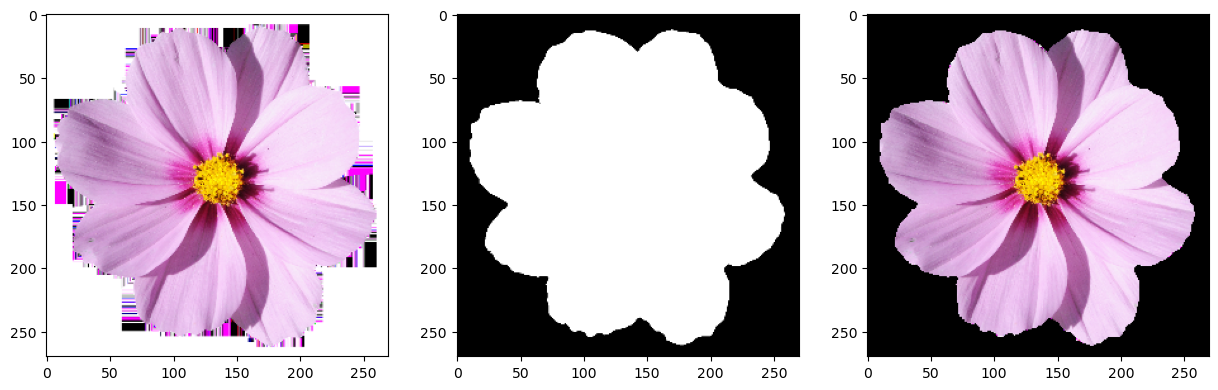

In [247]:
fig,axes =  plt.subplots(1, 3,figsize = (15,5))
axes[0].imshow(cv2.cvtColor(img_fg,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(mask, cmap=plt.cm.gray,vmax=255,vmin=0)
axes[2].imshow(cv2.cvtColor(masked,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

In [248]:
t_img_bg = cv2.bitwise_and(img_bg,img_bg,mask = mask_inv)
t_img_fg = cv2.bitwise_and(new_fg,new_fg,mask = new_mask)
tampered_img = cv2.add(t_img_bg,t_img_fg)

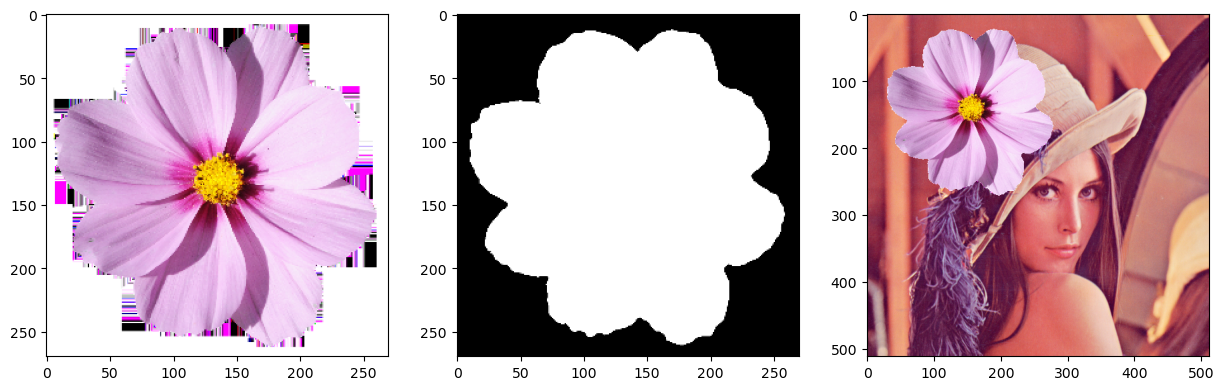

In [249]:
fig,axes =  plt.subplots(1, 3,figsize = (15,5))
axes[0].imshow(cv2.cvtColor(img_fg,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(mask, cmap=plt.cm.gray,vmax=255,vmin=0)
axes[2].imshow(cv2.cvtColor(tampered_img,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

In [250]:
cv2.imwrite("Lena_flower.png",tampered_img)
cv2.imwrite("mask_lena_flower.png",new_mask)

True